# 1 - What are image convolutions?

Basically, the process of convolution in images is an *element-wise multiplication of two matrices followed by a sum* [1]. The main idea follows these three steps:

<ol>
    <li>Take two matrices (which both have the same dimensions).</li>
    <li>Multiply them, element-by-element (i.e., not the dot product, just a simple multiplication).</li>
    <li>Sum the elements together.</li>
</ol>

# 2 - What are these matrices? 

To understand the meaning of the matrices, we can make an analogy of ``Big Matrix`` and ``Tiny Matrix``, being the ``Big Matrix`` is an image and the ``Tiny Matrix`` is the kernel. The center of the kernel should be positioned at the top left of the image, also slide from left to right and top to bottom, applying a mathematical operation (i.e., a convolution) at each (x, y)-coordinate of the original image.

<center>
    <figure style="margin-top:20px">
        <img src="images/kernel.png" width="300">
        <figcaption style="margin-top:20px">Figura 1 - Kernel sliding from left to right and up to bottom over the  ``Big Matrix`` [1].</figcaption>
    </figure>
</center>

Now we already know the base of convolution and the meaning of kernels, some questions may appear, like: 

<ol>
    <li>
        <b>What is the purpose of the convolution?</b><br/>
        Produce a new image based on pre-defined kernel and the ``Big Matrix``, where this new image has the same dimension that ``Big Matrix``. 
    </li>
    <li>
        <b>What will we gain with that technique?</b><br/>
        With this tool, we win several ''filters", as blurring and sharpening, also an important aid for edge detections, noise removal, etc.  
    </li>
</ol>

<center>
    <figure style="margin-top:20px">
        <img src="images/examples.png" width="500">
        <figcaption style="margin-top:20px">Figura 2 - Examples of convolutions [1].</figcaption>
    </figure>
</center>

For more informations about kernels and convolution, look the references [2] [3]. 

# 3 - Implementation

To implement a convolution, we can follow the following steps:

<ol>
    <li>Obtain an input image.</li>
    <li>Obtain a kernel matrix that we are going to apply to the input image.</li>
    <li>Create an output image to store the output of the image convolved with the kernel.</li>
    <li>
        For each pixel of input image, do:
        <ol>
            <li>Select an (x, y)-coordinate from the original image.</li>
            <li>Place the center of the kernel at this (x, y)-coordinate.</li>
            <li>Take the element-wise multiplication of the input image region and the kernel, then sum
    up the values of these multiplication operations into a single value. The sum of these
    multiplications is called the kernel output.</li>
            <li>Use the same (x, y)-coordinates from step A, but this time, store the kernel output at the
    same (x, y)-location as the output image.</li>
        </ol>
    </li>
</ol>

<div class="alert alert-info">
<b>Let's start coding.</b>
</div>

In [1]:
# Importing OpenCV, Numpy and pyplot
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity as rescale

In [2]:
# Defining the function to convolve images
def convolve(img, kernel):
    # Obtaining the shape of matrices
    i_rows, i_cols = img.shape[:2]
    k_rows, k_cols = kernel.shape[:2]
    
    # Discovering how many pixels is needed to surround the image
    pad_r = k_rows // 2
    pad_c = k_cols // 2
    
    output = np.zeros((i_rows,i_cols), dtype='float')
    
    img = cv2.copyMakeBorder(img, pad_r, pad_r, pad_c, pad_c, cv2.BORDER_CONSTANT)
        
    for i in range(0, i_rows):
        for j in range(0, i_cols):            
            # Creating a window of same width and height of kernel
            crop = img[i : i + (pad_r * 2) + 1, j : j + (pad_c * 2) + 1]
            
            # Applying product operation
            result = (crop * kernel).sum()
                        
            # Storing the result
            output[i,j] = result
            
    output = rescale(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    
    return output

## 3.1) Kernels

Before we start our tests, let's define some kernels:

<table style="float:left;margin-left:150px">
    <tr>
        <th>Operation</th>
        <th>Kernel</th>
        <th>Image</th>
    </tr>
    <tr>
        <td>Identity</td>
        <td>
            $$\begin{matrix}
             0 & 0 & 0 \\
             0 & 1 & 0 \\
             0 & 0 & 0
             \end{matrix}$$
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png" width="100">
        </td>
    </tr>
    <tr>
        <td>Sobel X</td>
        <td>
            $$\begin{matrix}
             -1 & 0 & 1 \\
             -2 & 0 & 2 \\
             -1 & 0 & 1
             \end{matrix}$$
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/8/8d/Vd-Edge1.png" width="100">
        </td>
    </tr>
    <tr>
        <td>Sobel Y</td>
        <td>
            $$\begin{matrix}
             -1 & -2 & -1 \\
             0 & 0 & 0 \\
             1 & 2 & 1
             \end{matrix}$$
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/8/83/Vd-Edge2.png" width="100">
        </td>
    </tr>    
    <tr>
        <td>Laplacian</td>
        <td>
            $$\begin{matrix}
             0 & 1 & 0 \\
             1 & -4 & 1 \\
             0 & 1 & 0
             \end{matrix}$$
        </td>
        <td>
            <img src="images/laplacian.jpg" width="100">
        </td>
    </tr>
</table> 

<table style="float:right;margin-right:150px">
    <tr>
        <th>Operation</th>
        <th>Kernel</th>
        <th>Image</th>
    </tr>
    <tr>
        <td>Emboss</td>
        <td>
            $$\begin{matrix}
             -2 & -1 & 0 \\
             -1 & 1 & 1 \\
             0 & 1 & 2
             \end{matrix}$$
        </td>
        <td>
            <img src="images/emboss.jpg" width="100">
        </td>
    </tr>
    <tr>
        <td>Sharpen</td>
        <td>
            $$\begin{matrix}
             0 & -1 & 0 \\
             -1 & 5 & -1 \\
             0 & -1 & 0
             \end{matrix}$$
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/4/4e/Vd-Sharp.png" width="100">
        </td>
    </tr>
    <tr>
        <td>Blur</td>
        <td>
            $$\begin{matrix}
             \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
             \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
             \frac{1}{9} & \frac{1}{9} & \frac{1}{9}
             \end{matrix}$$
        </td>
        <td>
            <img src="https://upload.wikimedia.org/wikipedia/commons/0/04/Vd-Blur2.png" width="100">
        </td>
    </tr>
    <tr>
        <td>Gaussian Blur</td>
        <td>
            $$\begin{matrix}
             1 & 2 & 1 \\
             2 & 4 & 2 \\
             1 & 2 & 1
             \end{matrix}$$
        </td>
        <td>
            <img src="images/gaussian.jpg" width="100">
        </td>
    </tr>
</table> 

In [3]:
identity = np.array(([0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]), dtype="int")

sobelX = np.array(([-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]), dtype="int")

sobelY = np.array(([-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]), dtype="int")

sharpen = np.array(([0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]), dtype="int")

blur = np.ones((3,3), dtype='float') / 9

laplacian = np.array(([0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]), dtype="int")

emboss = np.array(([-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]), dtype="int")

gaussian = np.array(([1, 4, 1],
                     [2, 4, 2],
                     [1, 2, 1]), dtype="float") / 16

<div class="alert alert-info">
<b>Let's test.</b>
</div>

In [4]:
retina = cv2.imread('images/retina.jpg', 0)

# Shape of image
rows, cols = retina.shape

# Scale factor
scale = 0.5

# Scaled image
retina = cv2.resize(retina, (round(scale * cols), round(scale * rows)))

result_identity = convolve(retina, identity)
result_sobelx = convolve(retina, sobelX)
result_sobely = convolve(retina, sobelY)
result_sharpen = convolve(retina, sharpen)
result_blur = convolve(retina, blur)
result_laplacian = convolve(retina, laplacian)
result_emboss = convolve(retina,emboss)
result_gaussian = convolve(retina,gaussian)

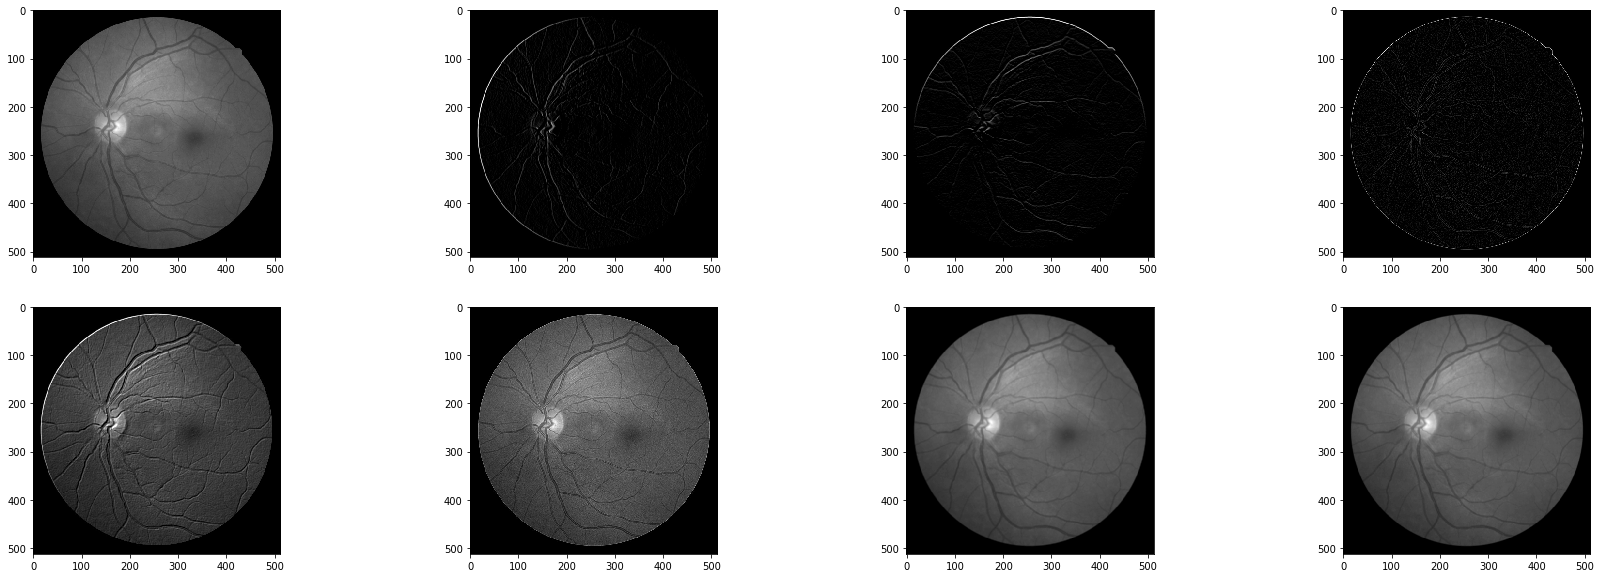

In [5]:
# Showing our results
f, axarr = plt.subplots(2,4, figsize=(30,10))
axarr[0,0].imshow(result_identity, cmap='gray')
axarr[0,1].imshow(result_sobelx, cmap='gray')
axarr[0,2].imshow(result_sobely, cmap='gray')
axarr[0,3].imshow(result_laplacian, cmap='gray')
axarr[1,0].imshow(result_emboss, cmap='gray')
axarr[1,1].imshow(result_sharpen, cmap='gray')
axarr[1,2].imshow(result_blur, cmap='gray')
axarr[1,3].imshow(result_gaussian, cmap='gray')
plt.show()

## 3.2) Using OpenCV's own functions

Until now, we saw how to create convolution function, but OpenCV has its own functions to perform these operations. So, it is the moment to get to know some of these functions.

### 3.2.1) Filter2D

This function has the responsibility of convolving images, like our <b>convolve</b>. 

<center>
    <strong>cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) → dst</strong>
</center>

where:

<ul>
    <li><i>src</i> – The image</li>
    <li><i>ddepth</i> – Desired depth of the destination image; if it is negative, it will be the same as src.depth(); the following combinations of src.depth() and ddepth are supported:
        <ul>
            <li>src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F</li>
            <li>src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F</li>
            <li>src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F</li>
            <li>src.depth() = CV_64F, ddepth = -1/CV_64F</li>
        </ul>
    </li>
    <li><i>kernel</i> – Convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split() and process them individually.</li>
    <li><i>dst</i> – Output image of the same size and the same number of channels as img.</li>
    <li><i>anchor</i> – Anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.</li>
    <li><i>delta</i> – Optional value added to the filtered pixels before storing them in dst.</li>
    <li><i>borderType</i> – Pixel extrapolation method.</li>
</ul>

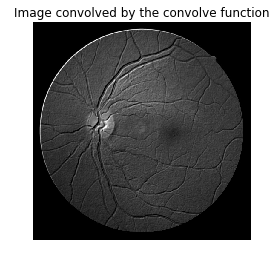

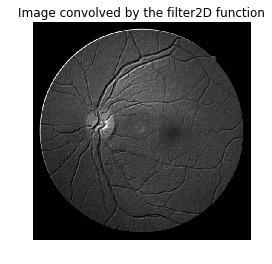

In [6]:
filter2D = cv2.filter2D(retina, -1, emboss)

# Comparative between convolve and filter2D
plt.figure()
plt.title("Image convolved by the convolve function")
plt.axis("off")
plt.imshow(result_emboss, cmap='gray')
plt.show()

plt.figure()
plt.title("Image convolved by the filter2D function")
plt.axis("off")
plt.imshow(filter2D, cmap='gray')
plt.show()

### 3.2.2) Blur's filters

Here we have 3 functions, that have the responsibility of blurring images, like our <b>convolve</b> with kernel *Blur* and *Gaussian Blur*. 

<center>
    <strong>cv2.blur(src, ksize[, dst[, anchor[, borderType]]]) → dst</strong><br />
    <strong>cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])  → dst</strong><br />
    <strong>cv2.medianBlur(src, ksize[, dst]) → dst</strong><br />
</center>

where:

<ul>
    <li><i>src</i> – The image</li>
    <li><i>ksize</i> – (**Blur**) blurring kernel size. (**Gaussian**) Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero’s and then they are computed from sigma*. (**Median**) Aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7, etc.</li>
    <li><i>dst</i> – Output image of the same size and the same number of channels as img.</li>
    <li><i>anchor</i> – Achor point; default value Point(-1,-1) means that the anchor is at the kernel center. The anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.</li>
    <li><i>delta</i> – Optional value added to the filtered pixels before storing them in dst.</li>
    <li><i>borderType</i> – Border mode used to extrapolate pixels outside of the image.</li>
    <li><i>sigmaX</i> – Gaussian kernel standard deviation in X direction.</li>
    <li><i>sigmaY</i> – Gaussian kernel standard deviation in Y direction. If sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height , respectively to fully control the result regardless of possible future modifications of all this semantics, it is recommended to specify all of ksize, sigmaX, and sigmaY.</li>
</ul>

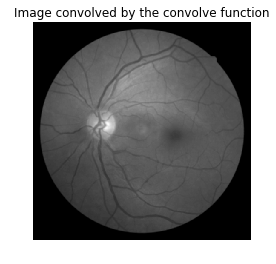

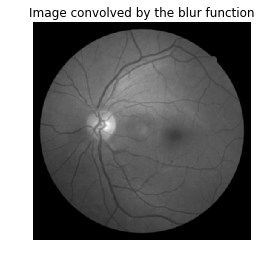

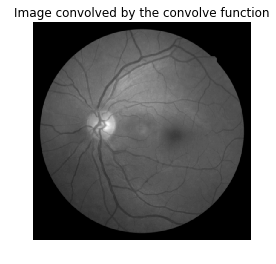

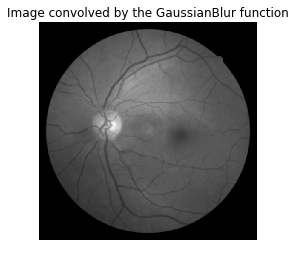

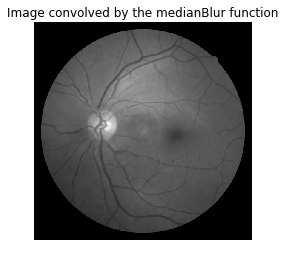

In [7]:
blurred = cv2.blur(retina, (3,3))
g_blurred = cv2.GaussianBlur(retina, (3,3), 0)
m_blurred = cv2.medianBlur(retina, 3)

# Comparative results
plt.figure()
plt.title("Image convolved by the convolve function")
plt.axis("off")
plt.imshow(result_blur, cmap='gray')
plt.show()

plt.figure()
plt.title("Image convolved by the blur function")
plt.axis("off")
plt.imshow(blurred, cmap='gray')
plt.show()

plt.figure()
plt.title("Image convolved by the convolve function")
plt.axis("off")
plt.imshow(result_gaussian, cmap='gray')
plt.show()

plt.figure()
plt.title("Image convolved by the GaussianBlur function")
plt.axis("off")
plt.imshow(g_blurred, cmap='gray')
plt.show()

plt.figure()
plt.title("Image convolved by the medianBlur function")
plt.axis("off")
plt.imshow(m_blurred, cmap='gray')
plt.show()

### 3.2.3) Laplacian filters

This function calculates the laplacian of an image. 

<center>
    <strong>cv2.Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]]) → dst</strong><br />
</center>

where:

<ul>
    <li><i>src</i> – The image</li>
    <li><i>ddepth</i> – Desired depth of the destination image.</li>
    <li><i>dst</i> – Output image of the same size and the same number of channels as img.</li>
    <li><i>ksize</i> – Aperture size used to compute the second-derivative filters. The size must be positive and odd.</li>
    <li><i>scale</i> – Optional scale factor for the computed Laplacian values. By default, no scaling is applied. </li>
    <li><i>delta</i> – Optional delta value that is added to the results prior to storing them in dst .</li>
    <li><i>borderType</i> – Border mode used to extrapolate pixels outside of the image.</li>
</ul>

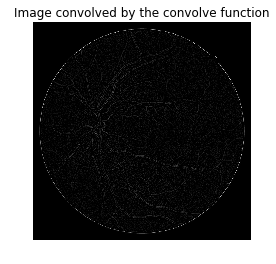

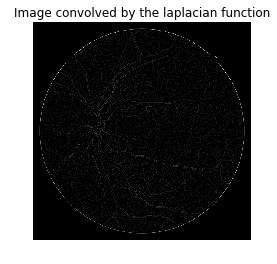

In [8]:
laplacian_ex = cv2.Laplacian(retina, -1)

# Comparative between convolve and filter2D
plt.figure()
plt.title("Image convolved by the convolve function")
plt.axis("off")
plt.imshow(result_laplacian, cmap='gray')
plt.show()

plt.figure()
plt.title("Image convolved by the laplacian function")
plt.axis("off")
plt.imshow(laplacian_ex, cmap='gray')
plt.show()

*To see more functions of filter, look for the reference [4]*.

# 4 - Histogram

A histogram represents the distribution of pixel intensities (whether color or grayscale) in an image [5]. The use of histograms may help us to get know several informations about our images, like **contrast, brightness** and **intensity**.

In OpenCV, we have the following function to calculate histograms: 

<center>
    <strong>cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) → hist</strong><br />
</center>

where:

<ul>
    <li><i>images</i> – Source arrays. They all should have the same depth, CV_8U or CV_32F , and the same size. Each of them can have an arbitrary number of channels.</li>
    <li><i>channels</i> – List of the dims channels used to compute the histogram. The first array channels are numerated from 0 to images[0].channels()-1 , the second array channels are counted from images[0].channels() to images[0].channels() + images[1].channels()-1, and so on.</li>
    <li><i>mask</i> – Optional mask. If the matrix is not empty, it must be an 8-bit array of the same size as images[i] . The non-zero mask elements mark the array elements counted in the histogram.</li>
    <li><i>histSize</i> – Array of histogram sizes in each dimension.</li>
    <li><i>ranges</i> – Array of the dims arrays of the histogram bin boundaries in each dimension. When the histogram is uniform ( uniform =true), then for each dimension i it is enough to specify the lower (inclusive) boundary $L_0$ of the 0-th histogram bin and the upper (exclusive) boundary $U_{\texttt{histSize}[i]-1}$ for the last histogram bin histSize[i]-1 . That is, in case of a uniform histogram each of ranges[i] is an array of 2 elements. When the histogram is not uniform ( uniform=false ), then each of ranges[i] contains histSize[i]+1 elements: $L_0, U_0=L_1, U_1=L_2, ..., U_{\texttt{histSize[i]}-2}=L_{\texttt{histSize[i]}-1}, U_{\texttt{histSize[i]}-1}$ . The array elements, that are not between $L_0$ and $U_{\texttt{histSize[i]}-1}$ , are not counted in the histogram. </li>
    <li><i>hist</i> – Output histogram, which is a dense or sparse dims -dimensional array.</li>
    <li><i>accumalate</i> – Accumulation flag. If it is set, the histogram is not cleared in the beginning when it is allocated. This feature enables you to compute a single histogram from several sets of arrays, or to update the histogram in time.</li>
</ul>

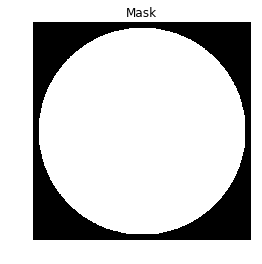

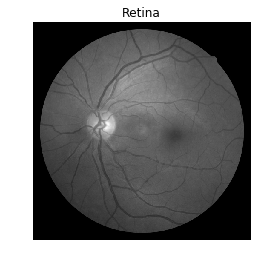

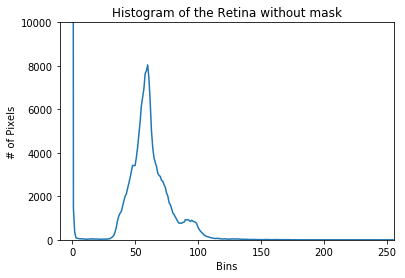

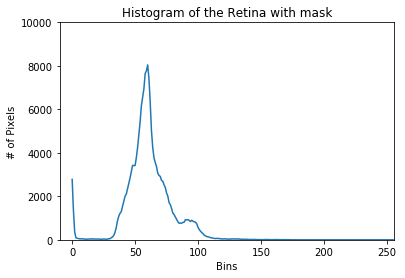

In [9]:
# Creating a mask for our image
mask = np.zeros(retina.shape, dtype='uint8')

centerX = mask.shape[0] // 2
centerY = mask.shape[1] // 2

cv2.circle(mask, (centerX, centerY), round(centerY * .95), 255, cv2.FILLED)

hist = cv2.calcHist([retina], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([retina], [0], mask, [256], [0, 256])

plt.figure()
plt.title("Mask")
plt.axis("off")
plt.imshow(mask, cmap='gray')
plt.show()

plt.figure()
plt.title("Retina")
plt.axis("off")
plt.imshow(retina, cmap='gray')
plt.show()

plt.figure()
plt.title("Histogram of the Retina without mask")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([-10, 256])
plt.ylim([0, 10000])
plt.show()

plt.figure()
plt.title("Histogram of the Retina with mask")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_mask)
plt.xlim([-10, 256])
plt.ylim([0, 10000])
plt.show()

## 4.1) Histogram equalization

The histogram equalization improves the contrast of an image by ```stretching``` the distribution of pixels.

The OpenCV has the following function to help us: 

<center>
    <strong>cv2.equalizeHist(src[, dst]) → dst</strong><br />
</center>

where:

<ul>
    <li><i>src</i> – Source 8-bit single channel image.</li>
    <li><i>dst</i> – Destination image of the same size and type as src.</li>
</ul>

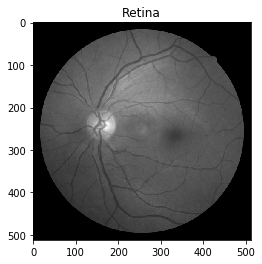

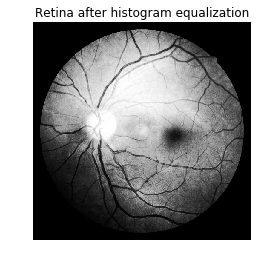

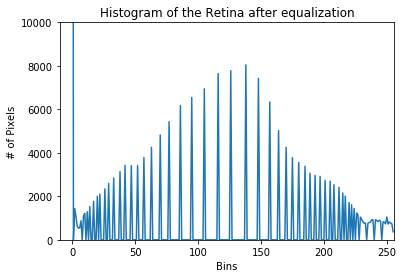

In [10]:
equalized = cv2.equalizeHist(retina)

plt.figure()
plt.title("Retina")
plt.imshow(retina, cmap='gray')
plt.show()

plt.figure()
plt.title("Retina after histogram equalization")
plt.axis("off")
plt.imshow(equalized, cmap='gray')
plt.show()

histAfter = cv2.calcHist([equalized], [0], None, [256], [0, 256])

plt.figure()
plt.title("Histogram of the Retina after equalization")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(histAfter)
plt.xlim([-10, 256])
plt.ylim([0, 10000])
plt.show()

# 5 - Thresholding

Basically, this technique is used when you wish to binarize an image. Normally, we performs the thresholding to focus on objects or areas of particular interest in an image, and here we will see some kinds of binarizations.

## 5.1) Simple Thresholding

The simple thresholding uses the human intervention, who informs the pixels which will receive value 0 and 255. With OpenCV, we can do it with function *threshold*. 

<center>
    <strong>cv2.threshold(src, thresh, maxval, type[, dst]) → retval, dst</strong><br />
</center>

where:

<ul>
    <li><i>src</i> – Input array (single-channel, 8-bit or 32-bit floating point).</li>
    <li><i>thresh</i> – Threshold value.</li>
    <li><i>maxval</i> – Maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.</li>
    <li><i>type</i> – THRESH_BINARY, THRESH_BINARY_INV, THRESH_TRUNC, THRESH_TOZERO, THRESH_TOZERO_INV.</li>
    <li><i>dst</i> – Output array of the same size and type as src.</li>
</ul>

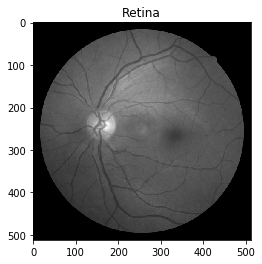

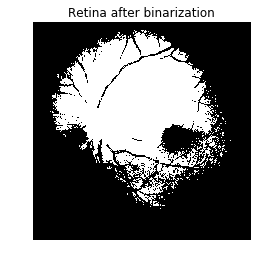

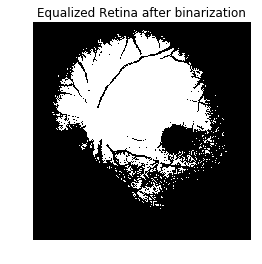

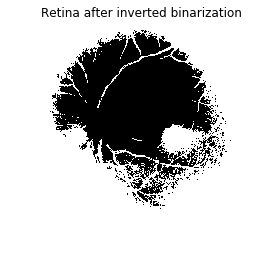

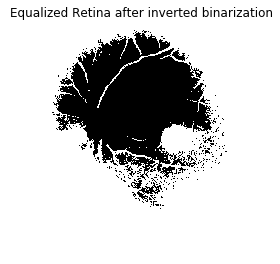

In [11]:
_, binarized = cv2.threshold(retina, 60, 255, cv2.THRESH_BINARY)
_, binarized_after = cv2.threshold(equalized, 155, 255, cv2.THRESH_BINARY)

_, binarized_inv = cv2.threshold(retina, 60, 255, cv2.THRESH_BINARY_INV)
_, binarized_after_inv = cv2.threshold(equalized, 155, 255, cv2.THRESH_BINARY_INV)

plt.figure()
plt.title("Retina")
plt.imshow(retina, cmap='gray')
plt.show()

plt.figure()
plt.title("Retina after binarization")
plt.axis("off")
plt.imshow(binarized, cmap='gray')
plt.show()

plt.figure()
plt.title("Equalized Retina after binarization")
plt.axis("off")
plt.imshow(binarized_after, cmap='gray')
plt.show()

plt.figure()
plt.title("Retina after inverted binarization")
plt.axis("off")
plt.imshow(binarized_inv, cmap='gray')
plt.show()

plt.figure()
plt.title("Equalized Retina after inverted binarization")
plt.axis("off")
plt.imshow(binarized_after_inv, cmap='gray')
plt.show()

## 5.2) Adaptative thresholding

To avoid the human intervention on which pixel should receives value 0 or 255, we can use an adaptative thresholding, that considers small neighbors of pixels and then finds an optimal threshold value T for each neighbor.

<center>
    <strong>cv.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst</strong><br />
</center>

where:

<ul>
    <li><i>src</i> – Source 8-bit single-channel image.</li>
    <li><i>maxValue</i> – 	Non-zero value assigned to the pixels for which the condition is satisfied.</li>
    <li><i>adaptiveMethod</i> – ADAPTIVE_THRESH_MEAN_C, ADAPTIVE_THRESH_GAUSSIAN_C. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries. </li>
    <li><i>thresholdType</i> – Same of simple threshold.</li>
    <li><i>blockSize</i> – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.</li>
    <li><i>C</i> – Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.</li>
    <li><i>dst</i> – Destination image of the same size and the same type as src.</li>
</ul>

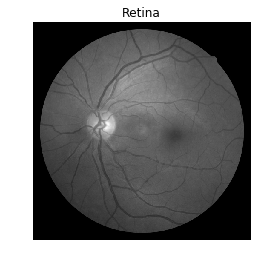

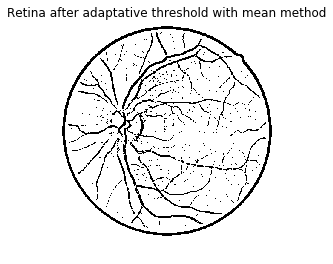

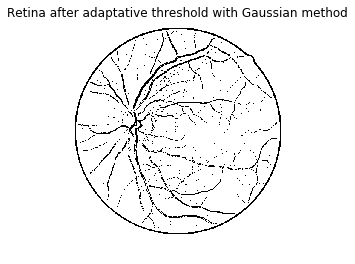

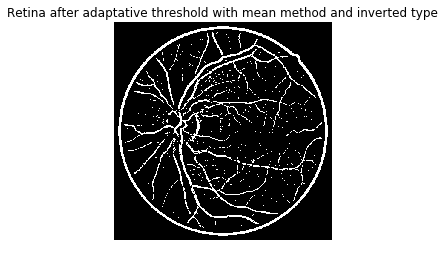

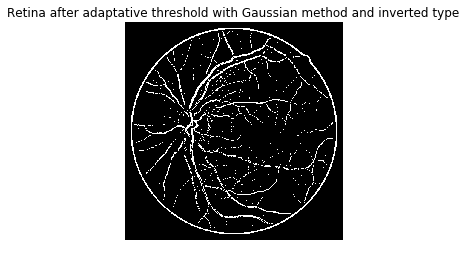

In [24]:
adaptative_mean = cv2.adaptiveThreshold(retina, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 4)
adaptative_gaussian = cv2.adaptiveThreshold(retina, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 4)

adaptative_mean_inv = cv2.adaptiveThreshold(retina, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 4)
adaptative_gaussian_inv = cv2.adaptiveThreshold(retina, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 4)

plt.figure()
plt.title("Retina")
plt.axis("off")
plt.imshow(retina, cmap='gray')
plt.show()

plt.figure()
plt.title("Retina after adaptative threshold with mean method")
plt.axis("off")
plt.imshow(adaptative_mean, cmap='gray')
plt.show()

plt.figure()
plt.title("Retina after adaptative threshold with Gaussian method")
plt.axis("off")
plt.imshow(adaptative_gaussian, cmap='gray')
plt.show()

plt.figure()
plt.title("Retina after adaptative threshold with mean method and inverted type")
plt.axis("off")
plt.imshow(adaptative_mean_inv, cmap='gray')
plt.show()

plt.figure()
plt.title("Retina after adaptative threshold with Gaussian method and inverted type")
plt.axis("off")
plt.imshow(adaptative_gaussian_inv, cmap='gray')
plt.show()

##### Besides these functions, there are other methods like Otsu’s Binarization, if you want get to know this method and other things, check this reference [6].

# References

[1] Rosebrock, A., 2017. Deep Learning for Computer Vision with Python. 1st ed. https://www.pyimagesearch.com: PyImageSearch.

[2] Leonardo Araujo dos Santos. 2018. Convolution · Artificial Inteligence. [ONLINE] Available at: https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolution.html. [Accessed 01 May 2018].

[3] Explained Visually. 2018. Image Kernels explained visually. [ONLINE] Available at: http://setosa.io/ev/image-kernels/. [Accessed 01 May 2018].

[4] Image Filtering — OpenCV 2.4.13.6 documentation. 2018. Image Filtering — OpenCV 2.4.13.6 documentation. [ONLINE] Available at: https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html. [Accessed 02 May 2018]. 

[5] Rosebrock, A., 2014. Practical Python and OpenCV: An Introductory, Example Driven Guide to Image Processing and Computer Vision. 1st ed. PyImageSearch.com.

[6] OpenCV: Image Thresholding. 2018. OpenCV: Image Thresholding. [ONLINE] Available at: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html. [Accessed 04 May 2018].